使用 多元正态分布 + 极大似然法 进行图片生成的测试

references:

+ https://github.com/metjush/gaussianMLE

In [ ]:
# 太小了, 看不清
# from sklearn.datasets import load_digits
# samples = load_digits()["data"]
# samples = (samples - samples.max()) / (samples.min() - samples.max())

In [115]:
from torchvision import datasets
from torchvision import transforms

dataset = datasets.MNIST(
    root="/tmp/mnist_data", download=True,
    transform=transforms.ToTensor()
)

samples = dataset.data.numpy()

samples = (samples / 255.)  #  * 2. - 1.  # 在 [-1, 1] 之间

samples = samples.reshape(-1, 28 * 28)

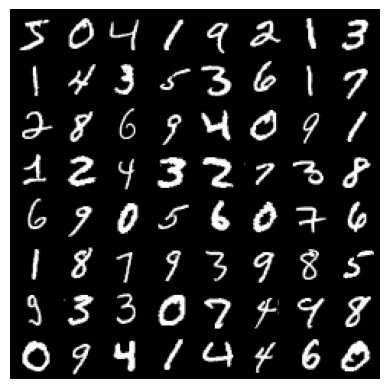

In [116]:
import torch 
import matplotlib.pyplot as plt 
from torchvision import utils as vutils


def draw_pictures(points):
    plt.axis('off')
    return plt.imshow(
        vutils.make_grid(
            torch.from_numpy(points).reshape(-1, 28, 28).unsqueeze(1), 
            padding=2, normalize=True
        ).permute(1, 2, 0).numpy()
    )


draw_pictures(samples[:64])

In [117]:
import numpy as np


class GaussianMLE(object):
    # http://www.sciencedirect.com/science/article/pii/0024379585900497
    def __init__(self, X):
        # X is a numpy array of size (observations) x (variables)
        self.X = X
        self.N = X.shape[1]
        self.M = X.shape[0]
        self.mu = np.zeros(X.shape[1], dtype=np.float64)
        self.sigma = np.zeros((X.shape[1],X.shape[1]), dtype=np.float64)
        self.fit = False
        # index mask for conditional probability
        self.mask = np.ones(X.shape[1], dtype=bool)
        self.reverse_mask = np.zeros(X.shape[1], dtype=bool)
        self.conditional_fit = False

    def _mean(self):
        # estimate the sample mean for each variable
        mean = np.mean(self.X, axis=0, dtype=np.float64)
        self.mu = mean
        return mean

    def _sigma(self):
        # estimate the variance covariance matrix
        diffs = self.X - self.mu
        dot = np.dot(diffs.T, diffs)
        sigma = dot/self.M
        self.sigma = sigma
        return sigma

    def estimate(self):
        # estimate the distribution
        self._mean()
        self._sigma()
        print('Multivariate Gaussian distribution fit with MLE')
        print('The mean vector shape is:')
        print(self.mu.shape)
        print('The variance-covariance matrix shape is:')
        print(self.sigma.shape)
        self.fit = True

    def draw(self, size=1):
        # generate a random draw from the estimated distribution
        if not self.fit:
            self.estimate()
        return np.random.multivariate_normal(self.mu, self.sigma, size)

In [118]:
dist_model = GaussianMLE(samples)
dist_model.estimate()

Multivariate Gaussian distribution fit with MLE
The mean vector shape is:
(784,)
The variance-covariance matrix shape is:
(784, 784)


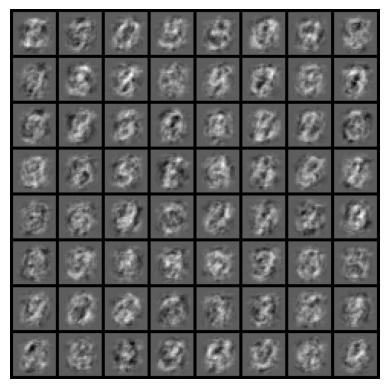

In [123]:
draw_pictures(dist_model.draw(64))